In [6]:
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [7]:
def AnalyseSA(plot_name, files, expected_results, iterations=10000, tempdrop=0, arg1=0.99999, arg2=0):
    # SYMULOWANE WYŻARZANIE
    actual_results = []
    error = []
    
    sum_of_perc_diff = 0
    
    index = 0
    for f in files:
        p1 = subprocess.Popen(
            ["../Debug/PEA_Projekt.exe", "SA", "../Debug/Data/"+f+".txt", str(arg1), str(arg2), str(tempdrop), "1000", "1", str(iterations), "0", "10"],
            stdout=subprocess.PIPE)
        single_result = float(p1.communicate()[0].strip())
        actual_results.append(single_result)

        sum_of_perc_diff += ((single_result - expected_results[index])/expected_results[index]*100)
        error.append((single_result - expected_results[index])/expected_results[index]*100)
        
        index+=1

    print(actual_results)
    print(error)
    
    print("Odchylenie od wyniku: ", sum_of_perc_diff/len(files))
    
    fig, axes = plt.subplots()
    plt.rcParams['figure.figsize'] = [20, 5]
    
    ind = np.arange(len(expected_results))
    width = 0.4   

    plt.bar(ind, expected_results, width, label='Wartosci globalnie minimalne')
    plt.bar(ind + width, actual_results, width,
        label='Wartosci obliczone przez algorytm')

    plt.ylabel('Wagi scieżek')
    plt.title(plot_name)

    plt.xticks(ind + width / 2, files)
    plt.legend(loc='best')
    
    for i, v in enumerate(files):
        text = ""
        if round(actual_results[i], -1) == round(expected_results[i], -1):
            text = "ALM. EQ"
        if actual_results[i] == expected_results[i]:
            text = "EQ"
        axes.text(i-.25, 
                  20, 
                  text, 
                  fontsize=10, 
                  color="y")
    
    plt.show()

[4738.2, 6902.2, 3286.5, 2862.5, 4644.2, 3305.4, 66421.4, 45205.7]
[127.25179856115108, 154.9759881787957, 158.37264150943395, 205.49626467449306, 188.45962732919253, 372.8755364806867, 161.55306162630436, 551.1912993373668]
Odchylenie od wyniku:  240.02202721217805


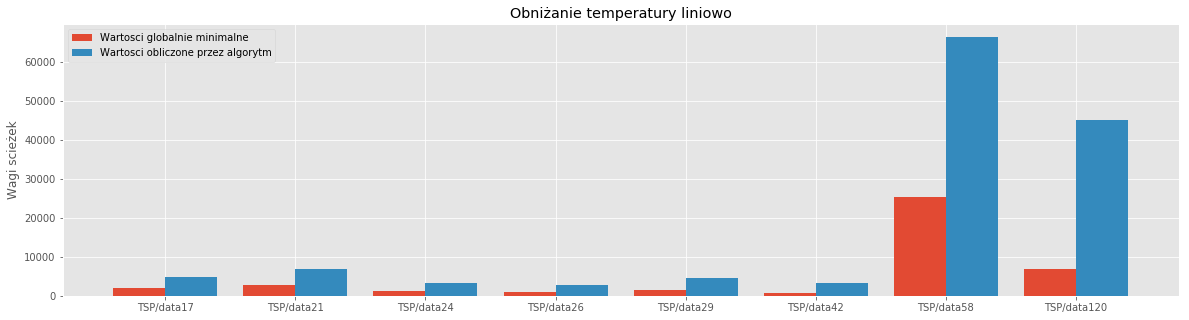

[2359.2, 3260.8, 1628.0, 1126.6, 2071.2, 1145.5, 41773.6, 19716.0]
[13.151079136690639, 20.458071666050987, 27.9874213836478, 20.23479188900746, 28.645962732919244, 63.876967095851214, 64.4953731049419, 184.01037165082107]
Odchylenie od wyniku:  52.85750483249129


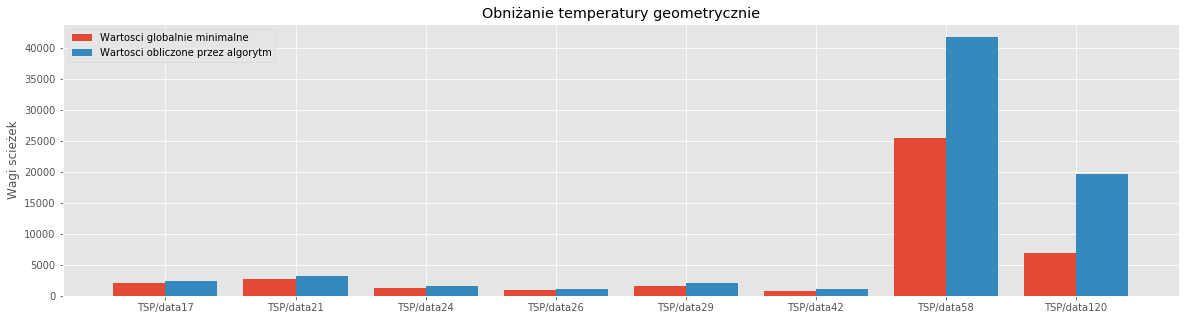

[3492.7, 6961.0, 3336.0, 2130.0, 4381.0, 2737.0, 114823.0, 48064.0]
[67.515587529976, 157.14813446619874, 162.26415094339623, 127.32123799359658, 172.11180124223603, 291.5593705293276, 352.14806064185865, 592.3653125900316]
Odchylenie od wyniku:  240.3042069920777


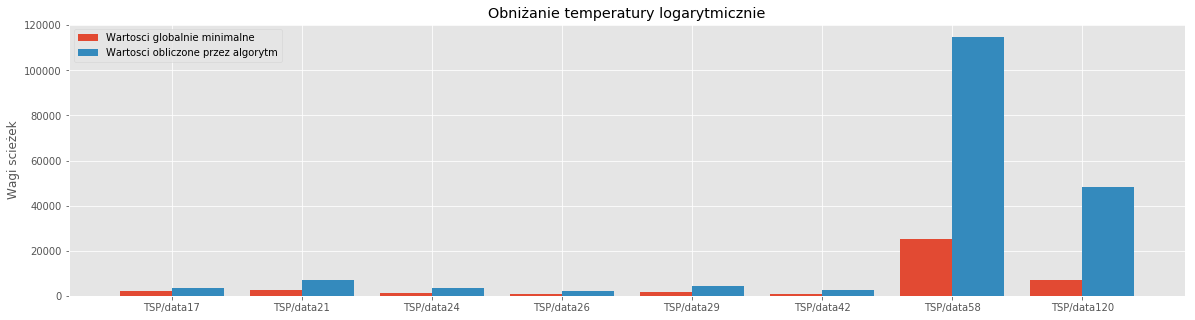

In [19]:
files = ["TSP/data17", "TSP/data21", "TSP/data24", "TSP/data26", "TSP/data29", "TSP/data42", "TSP/data58", "TSP/data120"]
expected_results = [2085, 2707, 1272, 937, 1610, 699, 25395, 6942]

AnalyseSA("Obniżanie temperatury liniowo", files, expected_results, iterations = 5000, tempdrop=0, arg1=0.99999, arg2=0)
AnalyseSA("Obniżanie temperatury geometrycznie", files, expected_results, iterations = 5000, tempdrop=1, arg1=1.000001, arg2=0)
AnalyseSA("Obniżanie temperatury logarytmicznie", files, expected_results, iterations = 5000, tempdrop=2, arg1=1.000001, arg2=2)

In [14]:
def AnalyseTS(plot_name, files, expected_results, iterations=10000, tabuListSize=16):
    # SYMULOWANE WYŻARZANIE
    actual_results = []
    error = []
    
    sum_of_perc_diff = 0
    
    index = 0
    for f in files:
        p1 = subprocess.Popen(
            ["../Debug/PEA_Projekt.exe", "TS", "../Debug/Data/"+f+".txt", str(iterations), str(tabuListSize), "0"],
            stdout=subprocess.PIPE)
        output = p1.communicate()[0].strip()
        print(output)
        single_result = float(output)
        actual_results.append(single_result)

        sum_of_perc_diff += ((single_result - expected_results[index])/expected_results[index]*100)
        error.append((single_result - expected_results[index])/expected_results[index]*100)
        
        index+=1

    print(actual_results)
    print(error)
    
    print("Odchylenie od wyniku: ", sum_of_perc_diff/len(files))
    
    fig, axes = plt.subplots()
    plt.rcParams['figure.figsize'] = [20, 5]

    ind = np.arange(len(expected_results))
    width = 0.4   

    plt.bar(ind, expected_results, width, label='Wartosci globalnie minimalne')
    plt.bar(ind + width, actual_results, width,
        label='Wartosci obliczone przez algorytm')

    plt.ylabel('Wagi scieżek')
    plt.title(plot_name)

    plt.xticks(ind + width / 2, files)
    plt.legend(loc='best')
    
    for i, v in enumerate(files):
        text = ""
        if round(actual_results[i], -1) == round(expected_results[i], -1):
            text = "ALM. EQ"
        if actual_results[i] == expected_results[i]:
            text = "EQ"
        axes.text(i-.25, 
                  20, 
                  text, 
                  fontsize=10, 
                  color="y")
    
    plt.show()

b'2149'
b'3253'
b'1402'
b'955'
b'1805'
b'853'
b'26936'
[2149.0, 3253.0, 1402.0, 955.0, 1805.0, 853.0, 26936.0]
[3.0695443645083933, 20.16992981159956, 10.220125786163523, 1.92102454642476, 12.111801242236025, 22.031473533619454, 6.068123646387084]
Odchylenie od wyniku:  10.798860418705543


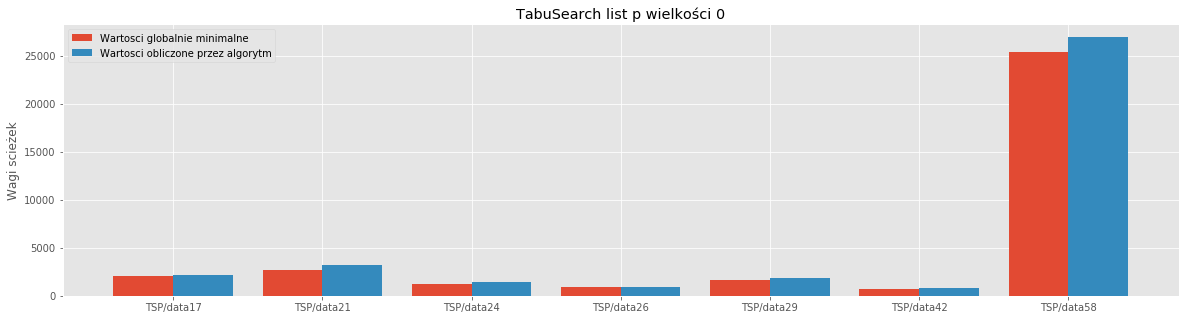

b'2149'
b'2852'
b'1283'
b'946'
b'1702'
b'825'
b'26936'
[2149.0, 2852.0, 1283.0, 946.0, 1702.0, 825.0, 26936.0]
[3.0695443645083933, 5.3564831917251565, 0.8647798742138365, 0.96051227321238, 5.714285714285714, 18.025751072961373, 6.068123646387084]
Odchylenie od wyniku:  5.722782876756277


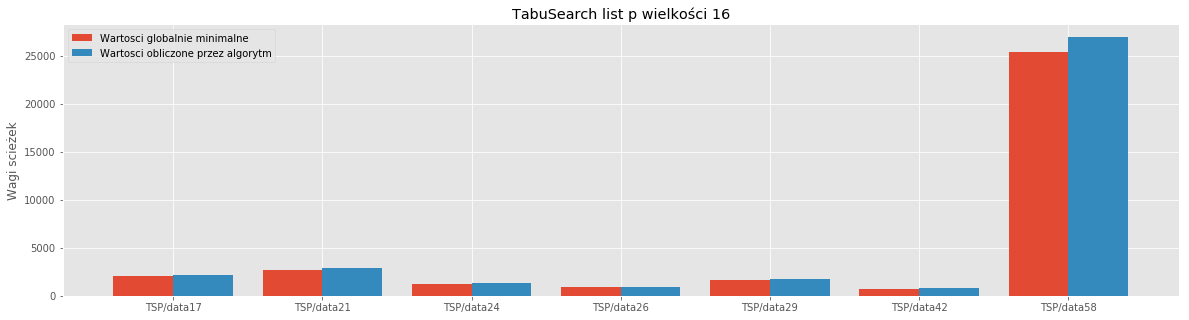

b'2149'
b'3243'
b'1352'
b'955'
b'1805'
b'827'
b'26936'
[2149.0, 3243.0, 1352.0, 955.0, 1805.0, 827.0, 26936.0]
[3.0695443645083933, 19.800517177687478, 6.289308176100629, 1.92102454642476, 12.111801242236025, 18.31187410586552, 6.068123646387084]
Odchylenie od wyniku:  9.653170465601411


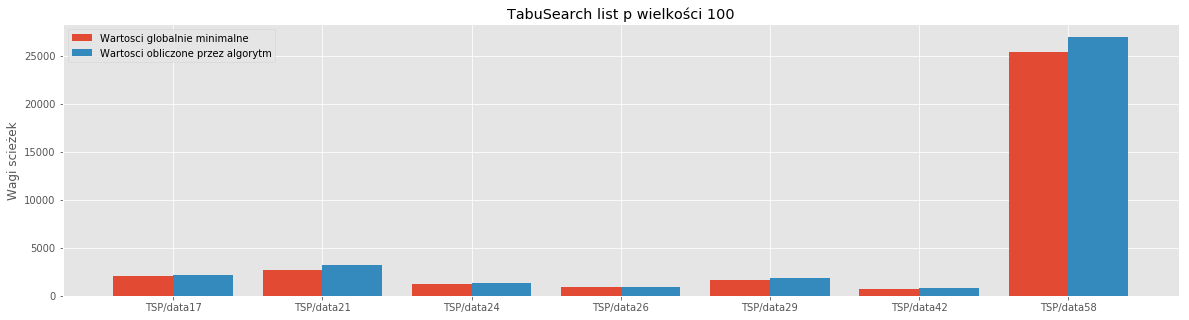

In [18]:
AnalyseTS("TabuSearch list p wielkości 0", files[:-1], expected_results[:-1], iterations=500, tabuListSize=0)
AnalyseTS("TabuSearch list p wielkości 16", files[:-1], expected_results[:-1], iterations=500, tabuListSize=16)
AnalyseTS("TabuSearch list p wielkości 100", files[:-1], expected_results[:-1], iterations=500, tabuListSize=100)